In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df=pd.read_csv('placement.csv')
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1
1,21,Female,Computer Science,0,7,1,1
2,22,Female,Information Technology,1,6,0,1
3,21,Male,Information Technology,0,8,1,1
4,22,Male,Mechanical,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0
2962,23,Male,Mechanical,1,7,0,0
2963,22,Male,Information Technology,1,7,0,0
2964,22,Male,Computer Science,1,7,0,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   HistoryOfBacklogs  2966 non-null   int64 
 6   PlacedOrNot        2966 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 162.3+ KB


In [104]:
df.shape

(2966, 7)

In [105]:
df['Gender'].replace({'Male':'1','Female':'0'},inplace=True)

In [106]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [107]:
df['Stream'].replace(
    {'Electronics And Communication':'0',
    'Computer Science':'1',
    'Information Technology':'2',
    'Mechanical':'3',
    'Electrical':'4',
    'Civil':'5'},inplace=True)

In [108]:
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,2,1,6,0,1
3,21,1,2,0,8,1,1
4,22,1,3,0,8,0,1


In [109]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

<Axes: >

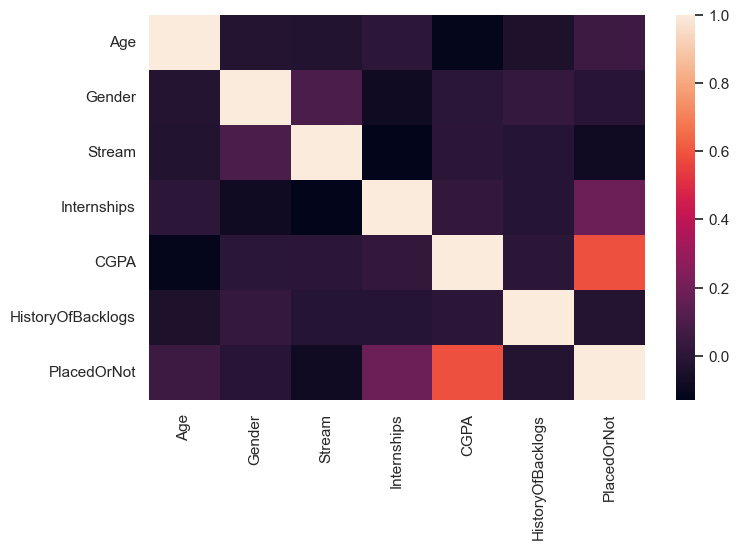

In [110]:
sns.heatmap(df.corr())

In [111]:
X=df.drop(['PlacedOrNot'],axis=1)
Y=df['PlacedOrNot']

In [112]:
X

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,1,0,1,8,1
1,21,0,1,0,7,1
2,22,0,2,1,6,0
3,21,1,2,0,8,1
4,22,1,3,0,8,0
...,...,...,...,...,...,...
2961,23,1,2,0,7,0
2962,23,1,3,1,7,0
2963,22,1,2,1,7,0
2964,22,1,1,1,7,0


## Implementing ML Model

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [114]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(2966, 6) (2372, 6) (594, 6)
(2966,) (2372,) (594,)


In [115]:
X_train

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
264,21,1,5,0,6,0
2775,20,0,2,1,7,0
1230,21,1,3,1,7,0
1532,22,1,1,1,6,0
2208,19,1,4,0,6,1
...,...,...,...,...,...,...
1242,21,1,1,1,9,0
367,21,1,1,0,8,1
2226,22,1,5,0,8,0
256,22,1,3,1,8,0


In [116]:
Y_train

264     0
2775    0
1230    0
1532    0
2208    0
       ..
1242    1
367     1
2226    1
256     1
1259    1
Name: PlacedOrNot, Length: 2372, dtype: int64

Applying K-Nearest Neighbour

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler=MinMaxScaler()

In [119]:
scaler.fit(X)

MinMaxScaler()

In [120]:
X=scaler.transform(X)
X

array([[0.27272727, 1.        , 0.        , 0.33333333, 0.75      ,
        1.        ],
       [0.18181818, 0.        , 0.2       , 0.        , 0.5       ,
        1.        ],
       [0.27272727, 0.        , 0.4       , 0.33333333, 0.25      ,
        0.        ],
       ...,
       [0.27272727, 1.        , 0.4       , 0.33333333, 0.5       ,
        0.        ],
       [0.27272727, 1.        , 0.2       , 0.33333333, 0.5       ,
        0.        ],
       [0.36363636, 1.        , 1.        , 0.        , 0.75      ,
        0.        ]])

In [121]:
acc=[]
for k in range(1,25):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)
    ac=accuracy_score(Y_test, Y_pred)
    acc.append(ac)

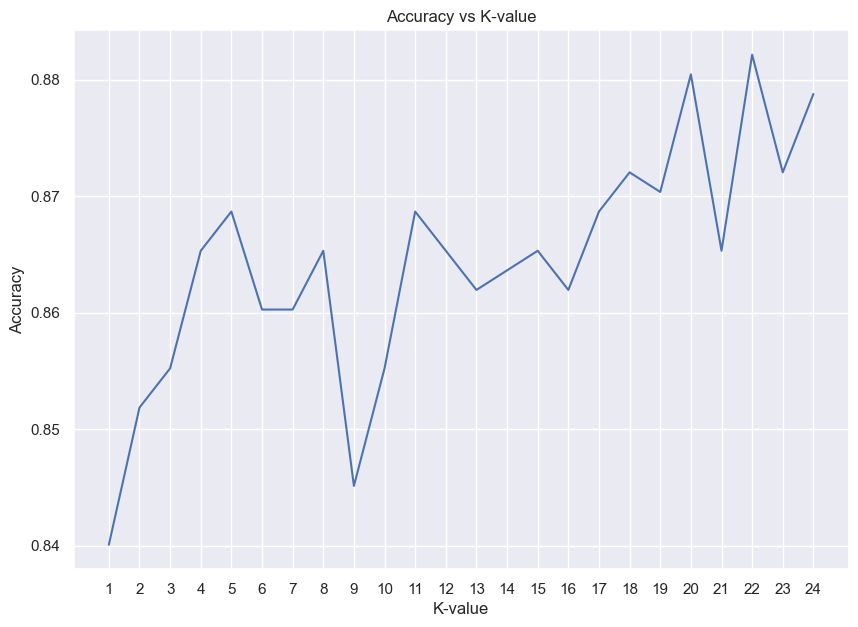

Maximum Accuracy 0.8821548821548821 at k: 22


In [122]:
plt.figure(figsize=(10,7))
plt.plot(range(1,25),acc)
plt.title("Accuracy vs K-value")
plt.xlabel("K-value")
plt.xticks(range(1,25))
plt.ylabel("Accuracy")
plt.show()
print(f"Maximum Accuracy {max(acc)} at k: {np.array(acc).argmax()+1}")

In [123]:
Knn= KNeighborsClassifier(n_neighbors=24, metric="euclidean")
Knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=24)

In [124]:
Y_pred=Knn.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,

In [125]:
Y_test

1736    0
344     1
1607    1
1571    1
396     1
       ..
2423    0
2449    0
2524    0
2453    0
2491    0
Name: PlacedOrNot, Length: 594, dtype: int64

In [126]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,Y_pred)
cm

array([[243,  16],
       [ 56, 279]], dtype=int64)

In [127]:
accuracy_KNN=accuracy_score(Y_test,Y_pred)
accuracy_KNN

0.8787878787878788

In [128]:
#Confusion Matrix
tp=cm[1][1] #true +ve
tn=cm[0][0] #true -ve
fp=cm[1][0] #false +ve
fn=cm[0][1] #false -ve

In [129]:
from sklearn.metrics import precision_score
precision_score(Y_test,Y_pred)

0.9457627118644067

In [130]:
from sklearn.metrics import f1_score
f1=f1_score(Y_test,Y_pred )
print(f1)

0.8857142857142858


Applying Decision Tree Accuracy

In [131]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [132]:
Y_pred=dtree.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [133]:
Y_test

1736    0
344     1
1607    1
1571    1
396     1
       ..
2423    0
2449    0
2524    0
2453    0
2491    0
Name: PlacedOrNot, Length: 594, dtype: int64

In [134]:
cm= confusion_matrix(Y_test, Y_pred)
cm

array([[235,  24],
       [ 51, 284]], dtype=int64)

In [135]:
accuracy_dt=accuracy_score(Y_test, Y_pred)
accuracy_dt

0.8737373737373737

In [136]:
f2 = f1_score(Y_test,Y_pred )
print(f2)

0.8833592534992223


In [137]:
#Confusion Matrix
tp=cm[1][1] 
tn=cm[0][0]
fp=cm[1][0]
fn=cm[0][1]

In [138]:
precision_score(Y_test,Y_pred)

0.922077922077922

Applying Random forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf=RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)

In [141]:
Y_pred=Knn.predict(X_test)
accuracy_Random_forest= accuracy_score(Y_test,Y_pred)

In [142]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[243,  16],
       [ 56, 279]], dtype=int64)

In [143]:
accuracy_Random_forest

0.8787878787878788

In [144]:
#Calculating F1_score
f4= f1_score(Y_test,Y_pred)
print(f1)

0.8857142857142858


In [145]:
#Confusion Matrix
tp=cm[1][1] 
tn=cm[0][0]
fp=cm[1][0]
fn=cm[0][1]

In [146]:
precision_score(Y_test, Y_pred)

0.9457627118644067

Applying Naive Bayes Classifier

In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])

In [148]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [149]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

In [150]:
Y_pred= classifier.predict(X_test)
Y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,

In [151]:
Y_test

1736    0
344     1
1607    1
1571    1
396     1
       ..
2423    0
2449    0
2524    0
2453    0
2491    0
Name: PlacedOrNot, Length: 594, dtype: int64

In [152]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[223,  36],
       [ 67, 268]], dtype=int64)

In [153]:
ac=accuracy_score(Y_test,Y_pred)
ac

0.8265993265993266

### Comparison of various ML Models in Predicting placement

In [154]:
algorithms=['KNN regression','Decision Tree','Random forest','GaussianNB']
scores=[accuracy_KNN,accuracy_Decision_Tree,accuracy_Random_forest,ac]

<Axes: xlabel='ML Models', ylabel='Accuracy score'>

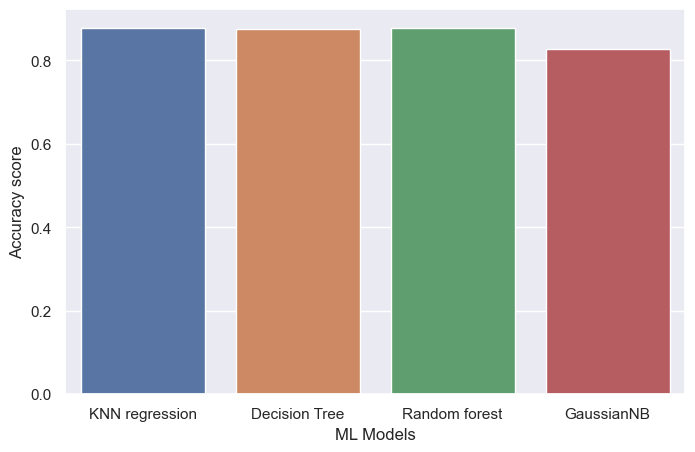

In [155]:
sns.set(rc={'figure.figsize':(8,5)})
plt.xlabel("ML Models")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms, y=scores)

In [156]:
import joblib
joblib.dump(dtree,"model.pkl")
model=joblib.load('model.pkl' )
model.predict(X_test)

c:\Users\klper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,